In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
train_data.shape

(42000, 785)

In [6]:
y_train = train_data["label"]
x_train = train_data.drop("label",axis=1)

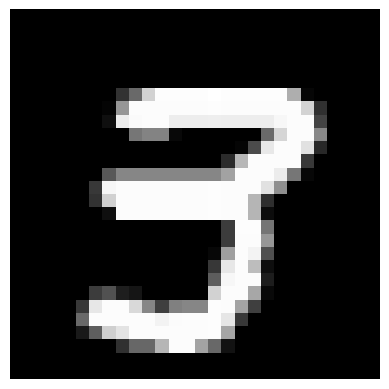

In [7]:
import matplotlib.pyplot as plt
x_digit = train_data.iloc[2000,1:]
x_digit_image = x_digit.values.reshape(28,28)
plt.imshow(x_digit_image,cmap='gray')
plt.axis("off")
plt.show()

In [8]:
x_train= x_train/255
test_data = test_data/255

In [9]:
x_train = x_train.values.reshape(-1,28,28,1)
test_images = test_data.values.reshape(-1,28,28,1)

In [10]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train,num_classes = 10)

In [11]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)


Training data split into:
- 33600 training images
- 8400 validation images

Displaying a sample image...


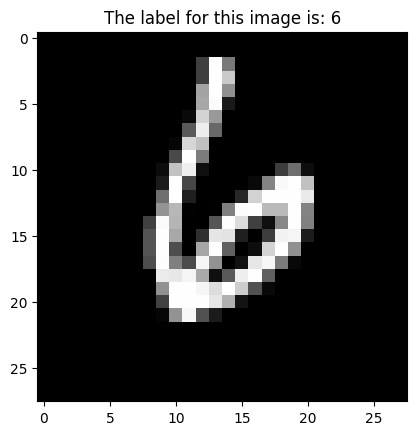

In [13]:
print(f"\nTraining data split into:")
print(f"- {x_train.shape[0]} training images")
print(f"- {x_val.shape[0]} validation images")

print("\nDisplaying a sample image...")
plt.imshow(x_train[0][:,:,0], cmap='gray')
plt.title(f"The label for this image is: {np.argmax(y_train[0])}")
plt.show()


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(28,28,1),activation="relu",padding="same"))
model.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(28,28,1),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation="relu",padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887,530 (3.39 MB)

 Trainable params: 887,530 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("\nCompiling the model...")
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
print("Model compiled successfully.")


Compiling the model...
Model compiled successfully.


In [17]:
datagen = ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(x_train)

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3, # how many epochs to wait before reducing
                                            verbose=1,
                                            factor=0.5, # factor to reduce the LR by
                                            min_lr=0.00001)

In [19]:
print("\nStarting model training...")
epochs = 30 # An epoch is one pass through the entire training dataset.
batch_size = 86 # The number of training examples utilized in one iteration.
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_val, y_val),
                              verbose=2,
                              callbacks=[learning_rate_reduction])
print("\nModel training finished.")


Starting model training...
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 - 23s - 58ms/step - accuracy: 0.8480 - loss: 0.4702 - val_accuracy: 0.9789 - val_loss: 0.0635 - learning_rate: 1.0000e-03
Epoch 2/30
391/391 - 11s - 28ms/step - accuracy: 0.9570 - loss: 0.1416 - val_accuracy: 0.9885 - val_loss: 0.0384 - learning_rate: 1.0000e-03
Epoch 3/30
391/391 - 11s - 28ms/step - accuracy: 0.9689 - loss: 0.1050 - val_accuracy: 0.9894 - val_loss: 0.0318 - learning_rate: 1.0000e-03
Epoch 4/30
391/391 - 11s - 28ms/step - accuracy: 0.9746 - loss: 0.0878 - val_accuracy: 0.9898 - val_loss: 0.0322 - learning_rate: 1.0000e-03
Epoch 5/30
391/391 - 10s - 26ms/step - accuracy: 0.9787 - loss: 0.0765 - val_accuracy: 0.9905 - val_loss: 0.0289 - learning_rate: 1.0000e-03
Epoch 6/30
391/391 - 10s - 26ms/step - accuracy: 0.9799 - loss: 0.0665 - val_accuracy: 0.9898 - val_loss: 0.0346 - learning_rate: 1.0000e-03
Epoch 7/30
391/391 - 10s - 26ms/step - accuracy: 0.9815 - loss: 0.0630 - val_accuracy: 0.9920 - val_loss: 0.0235 - learning_rate: 1.0000e-03
Epoch 8/30
391/391 - 10s


Evaluating model performance...


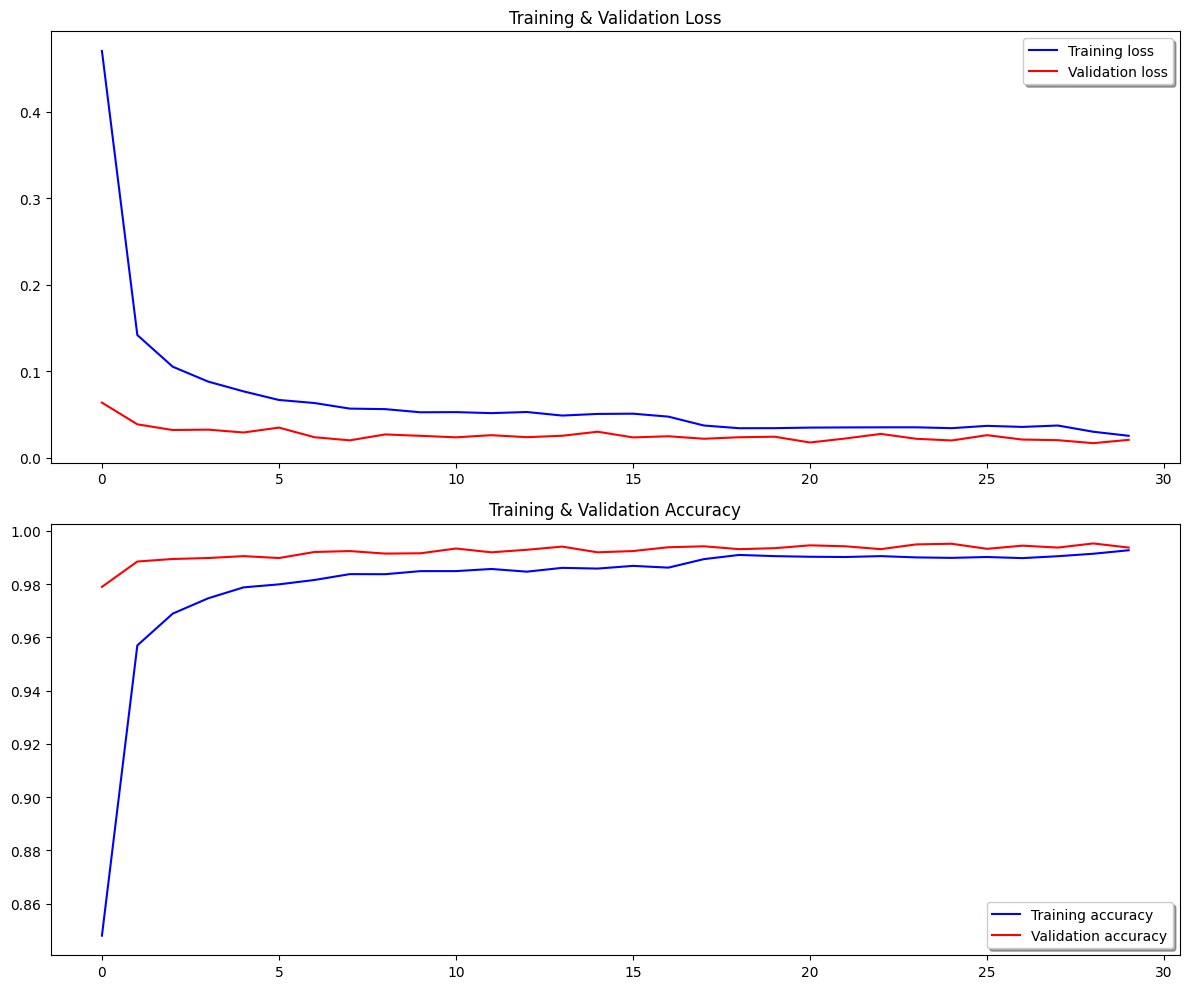


Generating predictions for the test set...
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Submission file 'mnist_submission.csv' created successfully!
You can now upload this file to the Kaggle competition to see your score.


In [20]:
# --- 6. Evaluate the Model ---
# We plot the training and validation loss and accuracy to see how our model performed.
print("\nEvaluating model performance...")
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plotting loss
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Training & Validation Loss")
ax[0].legend(loc='best', shadow=True)

# Plotting accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Training & Validation Accuracy")
ax[1].legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()


# --- 7. Predict and Create Submission File ---
print("\nGenerating predictions for the test set...")
# Use the trained model to predict the labels for the test images
predictions = model.predict(test_images)

# The output of model.predict is an array of 10 probabilities for each image.
# We need to select the index with the highest probability for each prediction.
predicted_labels = np.argmax(predictions, axis=1)

# Create the submission DataFrame in the format required by Kaggle
submission = pd.DataFrame({
    "ImageId": list(range(1, len(predicted_labels) + 1)),
    "Label": predicted_labels
})

# Save the submission file to CSV
submission_filename = "mnist_submission.csv"
submission.to_csv(submission_filename, index=False)

print(f"\nSubmission file '{submission_filename}' created successfully!")
print("You can now upload this file to the Kaggle competition to see your score.")